In [46]:
import os
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
import matplotlib as plt
import numpy as np

In [21]:
# import data
current_dir = os.getcwd()

# Construct the path to the 'data' directory relative to the current directory
data_dir = os.path.join(current_dir, '..', 'data')

# Access a specific file
df = pd.read_csv(os.path.join(data_dir, 'Bikeroad_Location.csv'), low_memory = False)

In [22]:
df.head()

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location
0,residential,NaN,yes,NaN,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.3478331 52.6098004, 13.347076 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,residential,NaN,yes,30,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.347866 52.608813, 13.347076 52....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3189287 52.4813095, 13.318873 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3183653 52.4789371, 13.3181786 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3155418 52.4796441, 13.3155083 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df[df["geometry"].isnull()]

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location
1210,NaN,NaN,NaN,NaN,Allee der Kosmo­nauten,NaN,NaN,NaN,NaN,100426.0,https://www.infravelo.de/projekt/allee-der-kos...,Marzahn-Hellersdorf,Grüner Seitenstreifen,Straßenseite,Beidseitig,road,POINT (52.5258556 13.5193002)
1479,NaN,NaN,NaN,NaN,Alt-Friedrichs­felde,NaN,NaN,NaN,NaN,100347.0,https://www.infravelo.de/projekt/alt-friedrich...,Lichtenberg,Grüner Seitenstreifen,Straßenseite,Ost,road,POINT (52.5095197 13.5189715)
3889,NaN,NaN,NaN,NaN,Am Wiesenweg,NaN,NaN,NaN,NaN,9090042.0,https://www.infravelo.de/projekt/am-wiesenweg/,Treptow-Köpenick,Gemeinsamer Geh- und Radweg,Streckenlänge,157 m,road,POINT (52.41289493470502 13.568773775532323)
4408,NaN,NaN,NaN,NaN,An der Wuhl­heide (Nord­seite),NaN,NaN,NaN,NaN,9090017.0,https://www.infravelo.de/projekt/an-der-wuhlhe...,Treptow-Köpenick,Schutzstreifen,Streckenlänge,3.267 m,road,NaN
5414,NaN,NaN,NaN,NaN,B96a (Ad­ler­ge­stell),NaN,NaN,NaN,NaN,9090075.0,https://www.infravelo.de/projekt/b96a-adlerges...,Treptow-Köpenick,Geschützter Radfahrstreifen,Streckenlänge,80 m,road,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61517,NaN,NaN,NaN,NaN,Wichert­straße,NaN,NaN,NaN,NaN,100338.0,https://www.infravelo.de/projekt/wichertstrasse/,Pankow,Grüner Seitenstreifen,Straßenseite,Beidseitig,road,POINT (52.5470187 13.424838)
62909,NaN,NaN,NaN,NaN,Wuhletalweg,NaN,NaN,NaN,NaN,9100033.0,https://www.infravelo.de/projekt/wuhletalweg/,Marzahn-Hellersdorf,Gemeinsamer Geh- und Radweg,Streckenlänge,897 m,road,NaN
63595,NaN,NaN,NaN,NaN,Zionskirchplatz,NaN,NaN,NaN,NaN,9010035.0,https://www.infravelo.de/projekt/zionskirchplatz/,Mitte,Verkehrsbeschilderung,Anzahl Wegweiser,2,road,POINT (52.5346033 13.403797262217864)
63627,NaN,NaN,NaN,NaN,Zobtener Straße,NaN,NaN,NaN,NaN,9110045.0,https://www.infravelo.de/projekt/zobtener-stra...,Lichtenberg,Fahrradstraße,Fläche,250 m²,road,POINT (52.4990881 13.4849141)


In [24]:
# remove all rows where there's no location info
df = df[df["geometry"].notnull()]

In [25]:
# transform to geopandas format to display
df['geometry'] = df['geometry'].apply(wkt.loads)
df.head()

,highway,lanes,lit,maxspeed,streetname,oneway,ref,smoothness,geometry,id,link,district,type,name,value,function,location
0,residential,NaN,yes,NaN,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.3478331 52.6098004, 13.347076 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,residential,NaN,yes,30,AEG-Siedlung Heimat,NaN,NaN,NaN,"LINESTRING (13.347866 52.608813, 13.347076 52....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3189287 52.4813095, 13.318873 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3183653 52.4789371, 13.3181786 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential,NaN,yes,30,Aachener Straße,NaN,NaN,NaN,"LINESTRING (13.3155418 52.4796441, 13.3155083 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

<Axes: >

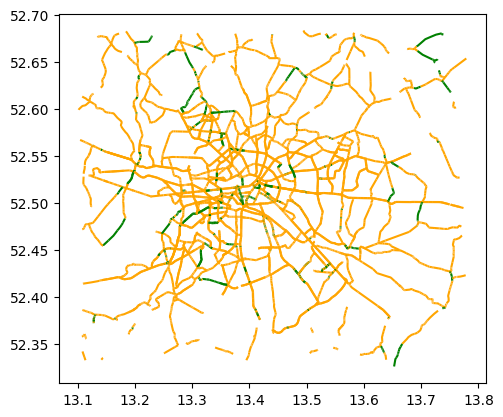

In [57]:
save = df["function"] == "road"
col = pd.Series(np.where(save, 'green', 'orange'))
gdf[gdf['highway'].isin(['primary', 'secondary'])].plot(color=col)

<Axes: >

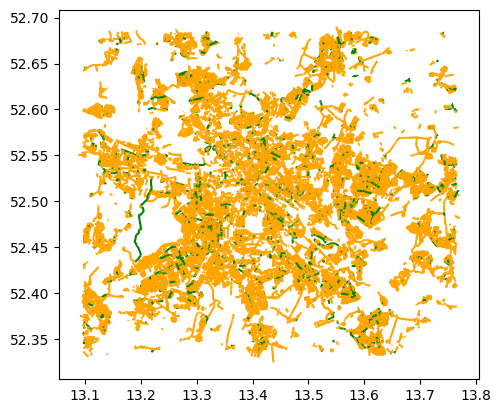

In [58]:
gdf[gdf['highway'].isin(['tertiary', 'residential'])].plot(color=col)